In [3]:
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv
from torchvision import transforms, datasets

import matplotlib.pyplot as plt

In [2]:
train = datasets.MNIST("", train=True, download=True, 
                       transform= transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, 
                       transform= transforms.Compose([transforms.ToTensor()]))

trainset = t.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = t.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # relu - rectified linear, sigmoid
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        res = F.log_softmax(x, dim=1)
        return res
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
# make a random tensor with the needed shape, just to test the net
# the negative one in the shape is be ready for any data size
X = t.rand((28,28))
X = X.view(-1, 28*28)

In [20]:
output = net(X)
output

tensor([[-2.2321, -2.3308, -2.2664, -2.2711, -2.2965, -2.2877, -2.3077, -2.3170,
         -2.3206, -2.4055]], grad_fn=<LogSoftmaxBackward>)

In [21]:
# optimizer
# you can freeze the first few layers, and later only change weights in the 
# deeper layers. To learn more general and after more specific

# learning rate determines the step of iteration towards the min error 
# steps too large can jump over the max and never see it
# steps too low can take ages to compute
# decaying learning rate - lr decreases over time, starts big

In [25]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)

# epoch - full pass over data
EPOCHS = 3
for epoch in range(EPOCHS):
    print(f"EPOCH: {epoch}")
    for data in trainset:
        # data is a batch of feat and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        # how wrong were we?
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.1223, grad_fn=<NllLossBackward>)
tensor(0.2166, grad_fn=<NllLossBackward>)
tensor(0.0022, grad_fn=<NllLossBackward>)


In [26]:
correct = 0
total = 0

# dont optimize, dont calculate the gradients
with t.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct += 1
            total += 1
print(f"Accuracy: {round(correct/total, 3)}")

Accuracy: 0.977


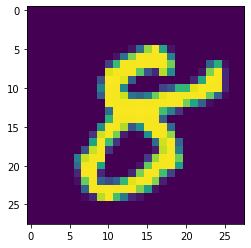

In [38]:
plt.imshow(X[7].view(28,28))
plt.show()

In [39]:
print(t.argmax(net(X[7].view(-1,28*28))[0]))

tensor(8)
